starting matching


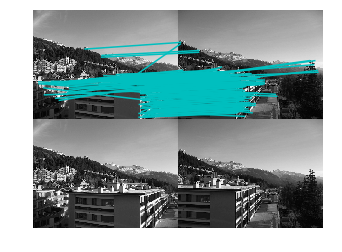

In [2]:
from pylab import *
from numpy import *
from PIL import Image

from PCV.localdescriptors import harris
from PCV.tools.imtools import imresize

"""
This is the Harris point matching example in Figure 2-2.
"""

im1 = array(Image.open("./data/crans_1_small.jpg").convert("L"))
im2 = array(Image.open("./data/crans_2_small.jpg").convert("L"))

# resize to make matching faster
im1 = imresize(im1,(im1.shape[1]/2,im1.shape[0]/2))
im2 = imresize(im2,(im2.shape[1]/2,im2.shape[0]/2))

wid = 5
harrisim = harris.compute_harris_response(im1,5) 
filtered_coords1 = harris.get_harris_points(harrisim,wid+1) 
d1 = harris.get_descriptors(im1,filtered_coords1,wid)

harrisim = harris.compute_harris_response(im2,5) 
filtered_coords2 = harris.get_harris_points(harrisim,wid+1) 
d2 = harris.get_descriptors(im2,filtered_coords2,wid)

print 'starting matching'
matches = harris.match_twosided(d1,d2)

figure()
gray() 
harris.plot_matches(im1,im2,filtered_coords1,filtered_coords2,matches) 
show()